# Loan Prediction Problem Dataset
Target Variable : loan_status

### Import Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, roc_auc_score,precision_score,roc_curve

### Load Dataset

In [73]:
loan = pd.read_csv(r"C:\Users\Anakha Jose\Downloads\loan_approval_dataset.csv")
loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### Basic Data Understanding

In [74]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Checking Duplicate values

In [75]:
loan.duplicated().sum()

np.int64(0)

### Missing value Analysis

In [76]:
loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [77]:
loan[" loan_status"].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

### Target Variable Analysis 

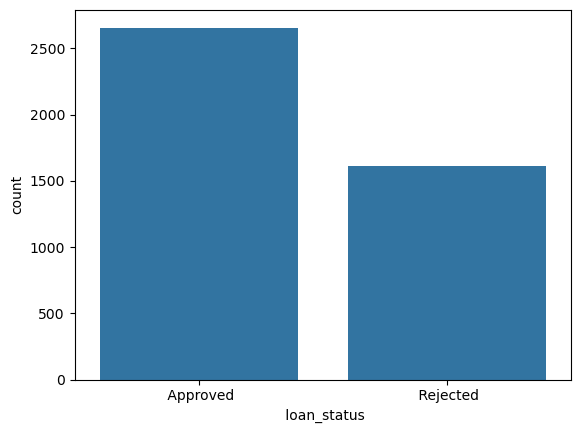

In [78]:
sns.countplot(x=" loan_status",data=loan)
plt.show()

### Encoding Categorical Variables

In [79]:
from sklearn.preprocessing import LabelEncoder

edu_le = LabelEncoder()
emp_le = LabelEncoder()

loan[' education'] = edu_le.fit_transform(loan[' education'])
loan[' self_employed'] = emp_le.fit_transform(loan[' self_employed'])
loan[' loan_status'] = LabelEncoder().fit_transform(loan[" loan_status"])

In [80]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int64
 3    self_employed             4269 non-null   int64
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


### Check Correlated Columns

<Axes: >

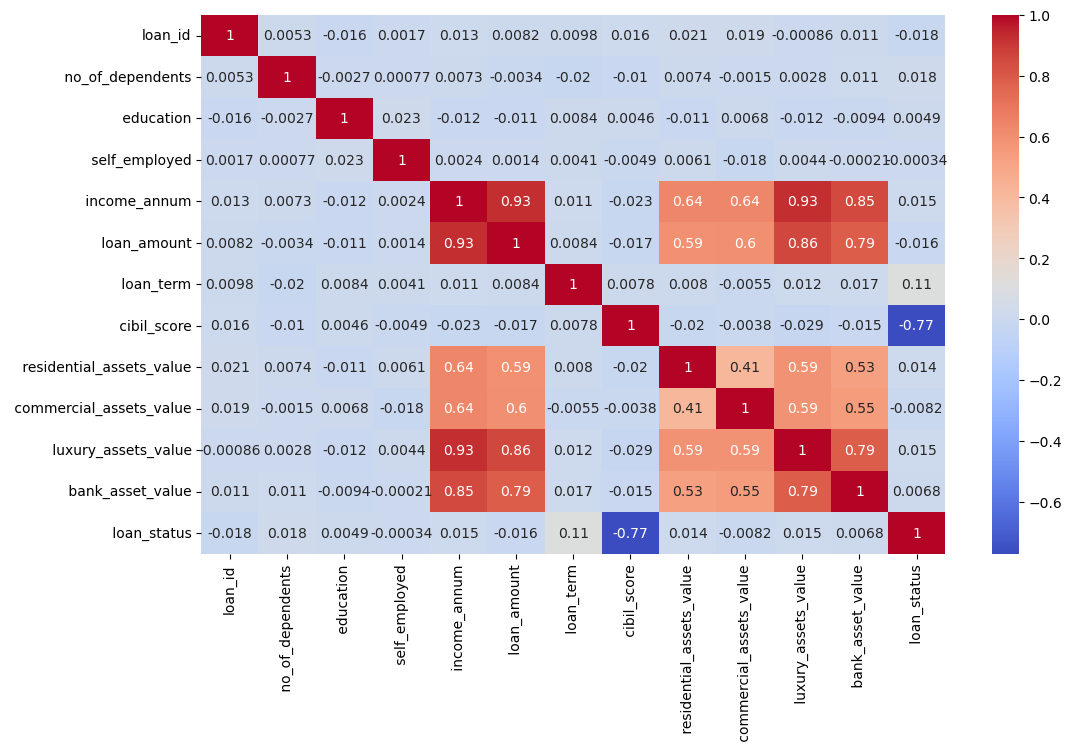

In [81]:
plt.figure(figsize=(12,7))
corr=loan.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")

### Drop Uncorrelated Columns

In [82]:
loan.drop(columns=["loan_id"],axis=1,inplace=True)

### Checking Outliers

In [83]:
loan.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

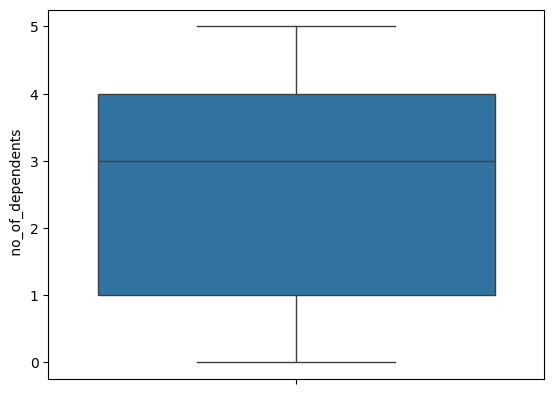

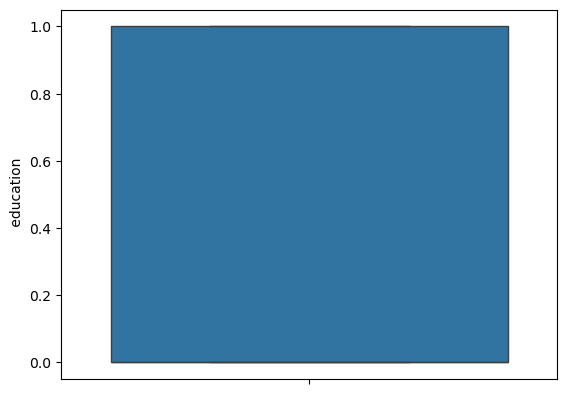

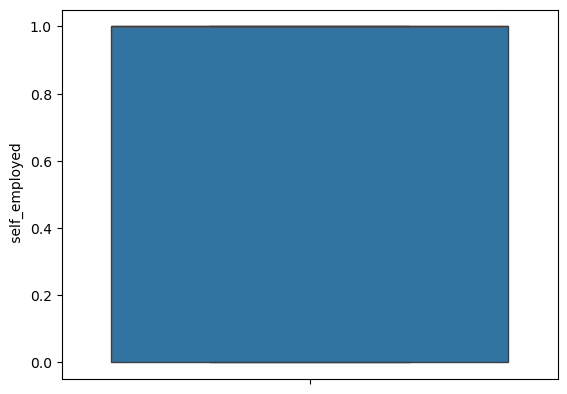

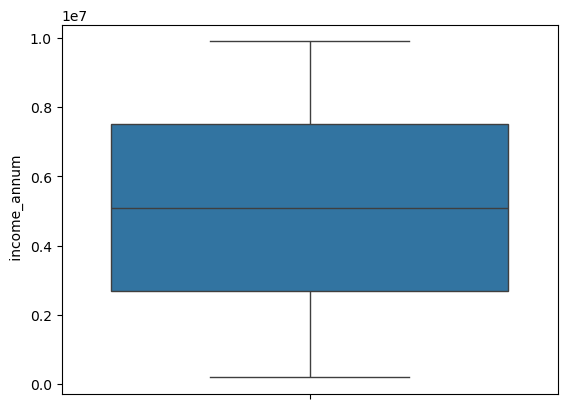

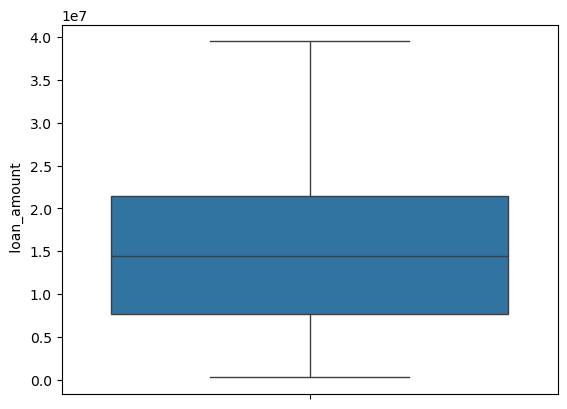

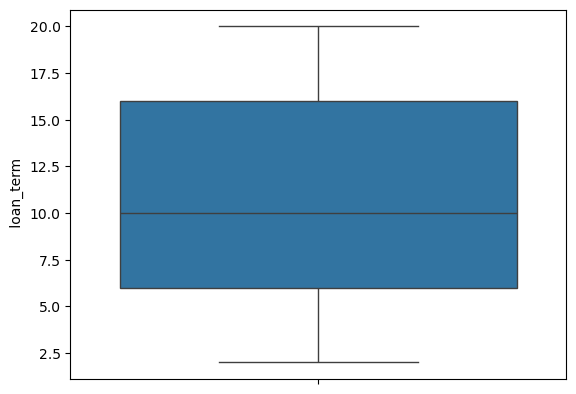

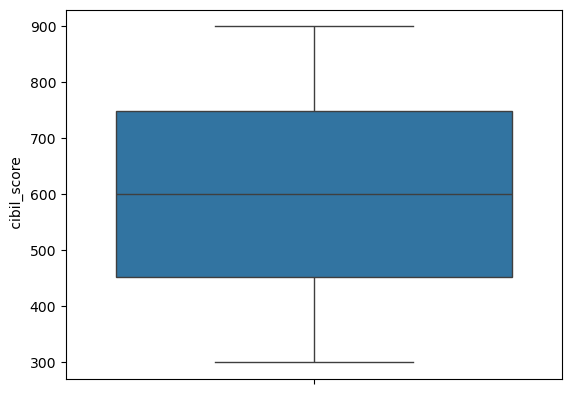

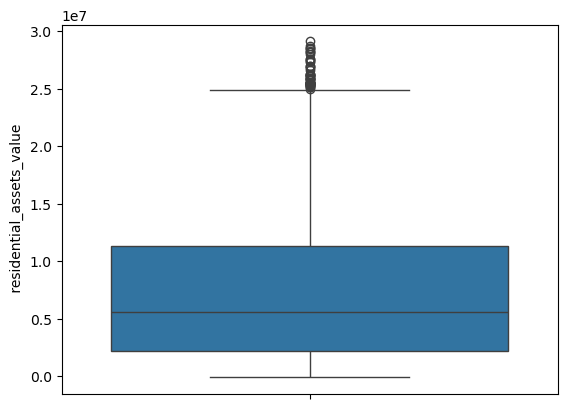

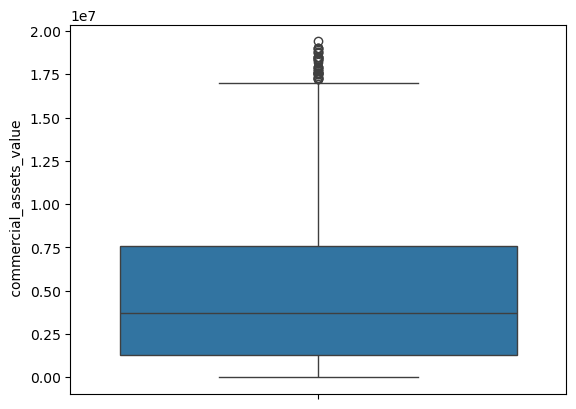

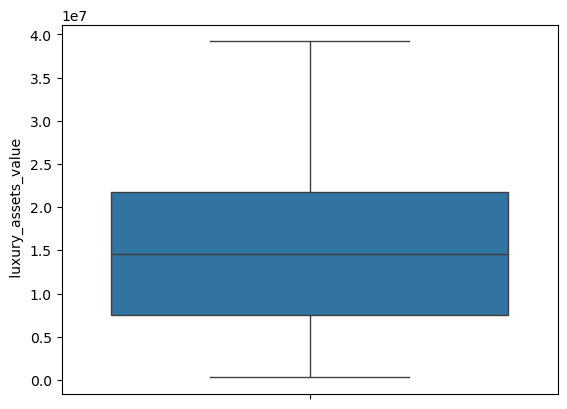

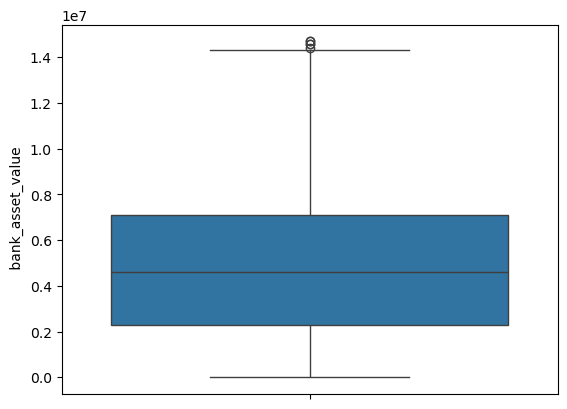

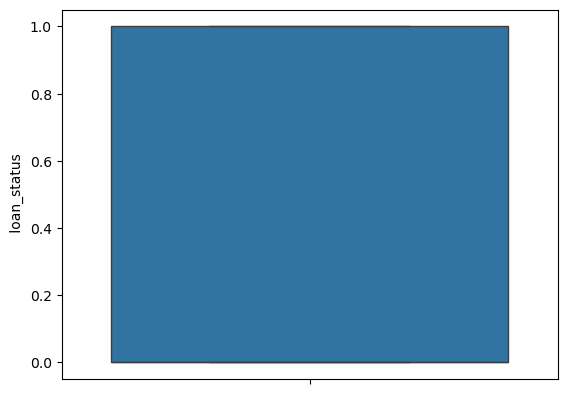

In [84]:
for i in loan.columns:
    sns.boxplot(loan[i])
    plt.show()

### Manage Outliers

In [85]:
out=[" bank_asset_value"," commercial_assets_value"," residential_assets_value"]
for i in out:
    Q1=loan[i].quantile(0.25)
    Q3=loan[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    loan[i]=loan[i].clip(lower,upper)

### Model Selection

In [102]:
x = loan.drop(' loan_status', axis=1)
y=loan[" loan_status"]

feature_order = x.columns.tolist()
joblib.dump(feature_order, "feature_order.pkl")

['feature_order.pkl']

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [104]:
sca=StandardScaler()
x_train_scaler=sca.fit_transform(x_train)
x_test_scaler=sca.fit_transform(x_test)

In [105]:
# LogisticRegression

model=LogisticRegression()
model.fit(x_train_scaler,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [106]:
y_pred=model.predict(x_test_scaler)

In [107]:
acr=accuracy_score(y_test,y_pred)
acr

0.9004683840749415

In [108]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[498,  38],
       [ 47, 271]])

In [109]:
import warnings
warnings.filterwarnings("ignore")
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92       536\n           1       0.88      0.85      0.86       318\n\n    accuracy                           0.90       854\n   macro avg       0.90      0.89      0.89       854\nweighted avg       0.90      0.90      0.90       854\n'

In [110]:
# KNN

model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaler,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [111]:
y_pred=model.predict(x_test_scaler)

In [112]:
acr=accuracy_score(y_test,y_pred)
acr

0.892271662763466

In [113]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[486,  50],
       [ 42, 276]])

In [114]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.91       536\n           1       0.85      0.87      0.86       318\n\n    accuracy                           0.89       854\n   macro avg       0.88      0.89      0.89       854\nweighted avg       0.89      0.89      0.89       854\n'

In [115]:
# GaussianNB

model=GaussianNB()
model.fit(x_train_scaler,y_train)

,priors,None
,var_smoothing,1e-09


In [116]:
y_pred=model.predict(x_test_scaler)

In [117]:
acr=accuracy_score(y_test,y_pred)
acr

0.9332552693208431

In [118]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[502,  34],
       [ 23, 295]])

In [119]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       536\n           1       0.90      0.93      0.91       318\n\n    accuracy                           0.93       854\n   macro avg       0.93      0.93      0.93       854\nweighted avg       0.93      0.93      0.93       854\n'

In [120]:
# SVC

model=SVC(kernel="linear")
model.fit(x_train_scaler,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [121]:
y_pred=model.predict(x_test_scaler)

In [122]:
acr=accuracy_score(y_test,y_pred)
acr

0.9168618266978923

In [123]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[497,  39],
       [ 32, 286]])

In [124]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.93       536\n           1       0.88      0.90      0.89       318\n\n    accuracy                           0.92       854\n   macro avg       0.91      0.91      0.91       854\nweighted avg       0.92      0.92      0.92       854\n'

In [125]:
# DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_split=10,min_samples_leaf=5,random_state=42)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [126]:
y_pred=model.predict(x_test)

In [127]:
acr=accuracy_score(y_test,y_pred)
acr

0.9613583138173302

In [128]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[528,   8],
       [ 25, 293]])

In [129]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97       536\n           1       0.97      0.92      0.95       318\n\n    accuracy                           0.96       854\n   macro avg       0.96      0.95      0.96       854\nweighted avg       0.96      0.96      0.96       854\n'

In [130]:
# RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,max_features=80,min_samples_split=10,min_samples_leaf=5,random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,80
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [131]:
y_pred=model.predict(x_test)

In [132]:
acr=accuracy_score(y_test,y_pred)
acr

0.977751756440281

In [133]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[528,   8],
       [ 11, 307]])

In [134]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       536\n           1       0.97      0.97      0.97       318\n\n    accuracy                           0.98       854\n   macro avg       0.98      0.98      0.98       854\nweighted avg       0.98      0.98      0.98       854\n'

In [135]:
# GradientBoostingClassifier

model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [136]:
y_pred=model.predict(x_test)

In [137]:
acr=accuracy_score(y_test,y_pred)
acr

0.977751756440281

In [138]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[528,   8],
       [ 11, 307]])

In [139]:
clr=classification_report(y_test,y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       536\n           1       0.97      0.97      0.97       318\n\n    accuracy                           0.98       854\n   macro avg       0.98      0.98      0.98       854\nweighted avg       0.98      0.98      0.98       854\n'

### Choosing Best Model

#### Train Evaluate & Store Results

### Create a Function to Evaluate Model

In [140]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    acr = accuracy_score(y_test, y_pred)
    cnf = confusion_matrix(y_test, y_pred)
    f1 = f1_score (y_test,y_pred)
    pre= precision_score(y_test,y_pred)
    roc=roc_curve(y_test,y_pred)
    
    return acr,cnf,f1,pre,roc

### Baseline Model - LinearRegression

In [141]:
lr = LogisticRegression()

lr_acr, lr_cnf, lr_f1, lr_pre, lr_roc = evaluate_model(
    lr, x_train, x_test, y_train, y_test)

print("Logistic Regression")
print("ACR:", lr_acr)
print("CNF:", lr_cnf)
print("F1:", lr_f1)
print("PRE:", lr_pre)
print("ROC:", lr_roc)

Logistic Regression
ACR: 0.7295081967213115
CNF: [[506  30]
 [201 117]]
F1: 0.5032258064516129
PRE: 0.7959183673469388
ROC: (array([0.        , 0.05597015, 1.        ]), array([0.        , 0.36792453, 1.        ]), array([inf,  1.,  0.]))


### KNeighbors Regression

In [142]:
knn = KNeighborsClassifier(n_neighbors=7, weights="distance")

knn_acr, knn_cnf, knn_f1, knn_pre, knn_roc = evaluate_model(
    knn, x_train_scaler, x_test_scaler, y_train, y_test)

print("KNeighbors Regression")
print("ACR:", knn_acr)
print("CNF:", knn_cnf)
print("F1:", knn_f1)
print("PRE:", knn_pre)
print("ROC:", knn_roc)

KNeighbors Regression
ACR: 0.8969555035128806
CNF: [[490  46]
 [ 42 276]]
F1: 0.8625
PRE: 0.8571428571428571
ROC: (array([0.       , 0.0858209, 1.       ]), array([0.        , 0.86792453, 1.        ]), array([inf,  1.,  0.]))


### Naive Byaes

In [143]:
nbs = GaussianNB()

nbs_acr, nbs_cnf, nbs_f1, nbs_pre, nbs_roc = evaluate_model(
    nbs, x_train_scaler, x_test_scaler, y_train, y_test)

print("Naive Bayes")
print("ACR:", nbs_acr)
print("CNF:", nbs_cnf)
print("F1:", nbs_f1)
print("PRE:", nbs_pre)
print("ROC:", nbs_roc)

Naive Bayes
ACR: 0.9332552693208431
CNF: [[502  34]
 [ 23 295]]
F1: 0.9119010819165378
PRE: 0.8966565349544073
ROC: (array([0.        , 0.06343284, 1.        ]), array([0.        , 0.92767296, 1.        ]), array([inf,  1.,  0.]))


### SVC

In [144]:
svc = SVC(kernel="linear")

svc_acr, svc_cnf, svc_f1, svc_pre, svc_roc = evaluate_model(
    svc, x_train_scaler, x_test_scaler, y_train, y_test)

print("SVR")
print("ACR:", svc_acr)
print("CNF:", svc_cnf)
print("F1:", svc_f1)
print("PRE:", svc_pre)
print("ROC:", svc_roc)

SVR
ACR: 0.9168618266978923
CNF: [[497  39]
 [ 32 286]]
F1: 0.8895800933125972
PRE: 0.88
ROC: (array([0.        , 0.07276119, 1.        ]), array([0.        , 0.89937107, 1.        ]), array([inf,  1.,  0.]))


### Decision Tree Classifier

In [145]:
dt = DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=5,random_state=42)

dt_acr, dt_cnf, dt_f1, dt_pre, dt_roc = evaluate_model(
    dt, x_train, x_test, y_train, y_test)

print("Decision Tree")
print("ACR:", dt_acr)
print("CNF:", dt_cnf)
print("F1:", dt_f1)
print("PRE:", dt_pre)
print("ROC:", dt_roc)

Decision Tree
ACR: 0.9613583138173302
CNF: [[528   8]
 [ 25 293]]
F1: 0.9466882067851373
PRE: 0.973421926910299
ROC: (array([0.        , 0.01492537, 1.        ]), array([0.        , 0.92138365, 1.        ]), array([inf,  1.,  0.]))


### Random Forest Classifier

In [146]:
rf = RandomForestClassifier( n_estimators=100,max_features=80,min_samples_split=10,min_samples_leaf=5,random_state=42)

rf_acr, rf_cnf, rf_f1, rf_pre, rf_roc = evaluate_model(
    rf, x_train, x_test, y_train, y_test)

print("Random Forest")
print("ACR:", rf_acr)
print("CNF:", rf_cnf)
print("F1:", rf_f1)
print("PRE:", rf_pre)
print("ROC:", rf_roc)

Random Forest
ACR: 0.977751756440281
CNF: [[528   8]
 [ 11 307]]
F1: 0.9699842022116903
PRE: 0.9746031746031746
ROC: (array([0.        , 0.01492537, 1.        ]), array([0.        , 0.96540881, 1.        ]), array([inf,  1.,  0.]))


### Gradient Boostning Classifer

In [147]:
gbr = GradientBoostingClassifier(n_estimators=100,max_depth=80,min_samples_split=10,min_samples_leaf=5,random_state=42)

gbr_acr, gbr_cnf, gbr_f1, gbr_pre, gbr_roc = evaluate_model(
    gbr, x_train, x_test, y_train, y_test)

print("Gradient Boosting")
print("ACR:", gbr_acr)
print("CNF:", gbr_cnf)
print("F1:", gbr_f1)
print("PRE:", gbr_pre)
print("ROC:", gbr_roc)

Gradient Boosting
ACR: 0.9918032786885246
CNF: [[533   3]
 [  4 314]]
F1: 0.988976377952756
PRE: 0.9905362776025236
ROC: (array([0.        , 0.00559701, 1.        ]), array([0.        , 0.98742138, 1.        ]), array([inf,  1.,  0.]))


### Cross - Validation

In [148]:
models = {
    "Logistic Regression": lr,
    "KNeighborsClassifier": knn,
    "Naive Bayes": nbs,
    "SVC": svc,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gbr}



for name, model in models.items():

    if name in ["KNN", "SVC"]:
        cv_score = cross_val_score(
            model,
            x_train_scaler,
            y_train,
            cv=5,
            scoring="f1"
        ).mean()
    else:
        cv_score = cross_val_score(
            model,
            x_train,
            y_train,
            cv=5,
            scoring="f1"
        ).mean()

    print(f"{name} CV f1: {cv_score:.4f}")

Logistic Regression CV f1: 0.5249
KNeighborsClassifier CV f1: 0.3243
Naive Bayes CV f1: 0.5757
SVC CV f1: 0.9057
Decision Tree CV f1: 0.9525
Random Forest CV f1: 0.9762
Gradient Boosting CV f1: 0.9830


### Graphical Model Comparison

#### STORE CV SCORES (FINAL RESULT DATA)

In [149]:
import pandas as pd

final_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "Naive Bayes",
        "SVC",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"],
    "Accuracy": [lr_acr, knn_acr, nbs_acr, svc_acr, dt_acr, rf_acr, gbr_acr],
    "Confusion Matrix": [lr_cnf, knn_cnf, nbs_cnf, svc_cnf, dt_cnf, rf_cnf, gbr_cnf],
    "F1 Score": [lr_f1, knn_f1, nbs_f1, svc_f1, dt_f1, rf_f1, gbr_f1],
    "Precision": [lr_pre, knn_pre, nbs_pre, svc_pre, dt_pre, rf_pre, gbr_pre],
    "ROC": [lr_roc, knn_roc, nbs_roc, svc_roc, dt_roc, rf_roc, gbr_roc] })

final_results

,Model,Accuracy,Confusion Matrix,F1 Score,Precision,ROC
0,Logistic Regression,0.729508,"[[506, 30], [201, 117]]",0.503226,0.795918,"([0.0, 0.055970149253731345, 1.0], [0.0, 0.367..."
1,KNN,0.896956,"[[490, 46], [42, 276]]",0.862500,0.857143,"([0.0, 0.08582089552238806, 1.0], [0.0, 0.8679..."
2,Naive Bayes,0.933255,"[[502, 34], [23, 295]]",0.911901,0.896657,"([0.0, 0.06343283582089553, 1.0], [0.0, 0.9276..."
3,SVC,0.916862,"[[497, 39], [32, 286]]",0.889580,0.880000,"([0.0, 0.07276119402985075, 1.0], [0.0, 0.8993..."
4,Decision Tree,0.961358,"[[528, 8], [25, 293]]",0.946688,0.973422,"([0.0, 0.014925373134328358, 1.0], [0.0, 0.921..."
5,Random Forest,0.977752,"[[528, 8], [11, 307]]",0.969984,0.974603,"([0.0, 0.014925373134328358, 1.0], [0.0, 0.965..."
6,Gradient Boosting,0.991803,"[[533, 3], [4, 314]]",0.988976,0.990536,"([0.0, 0.005597014925373134, 1.0], [0.0, 0.987..."


### Bar Plot

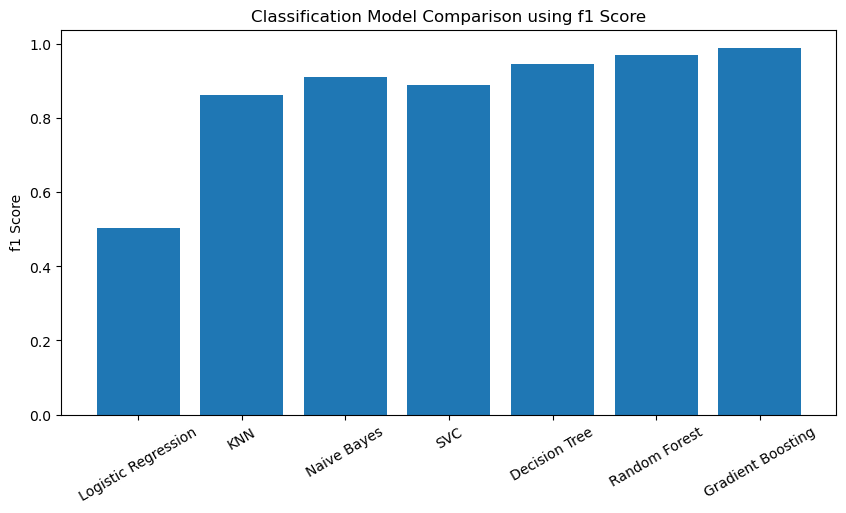

In [150]:
plt.figure(figsize=(10,5))
plt.bar(final_results["Model"], final_results["F1 Score"])
plt.xticks(rotation=30)
plt.ylabel("f1 Score")
plt.title("Classification Model Comparison using f1 Score")
plt.show()

### GROUPED BAR PLOT

In [151]:
import pandas as pd

final_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "Naive Bayes",
        "SVC",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"],
    "Accuracy": [lr_acr, knn_acr, nbs_acr, svc_acr, dt_acr, rf_acr, gbr_acr],
    "F1 Score": [lr_f1, knn_f1, nbs_f1, svc_f1, dt_f1, rf_f1, gbr_f1],
    "Precision": [lr_pre, knn_pre, nbs_pre, svc_pre, dt_pre, rf_pre, gbr_pre] })

In [152]:
metrics_melted = final_results.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score")

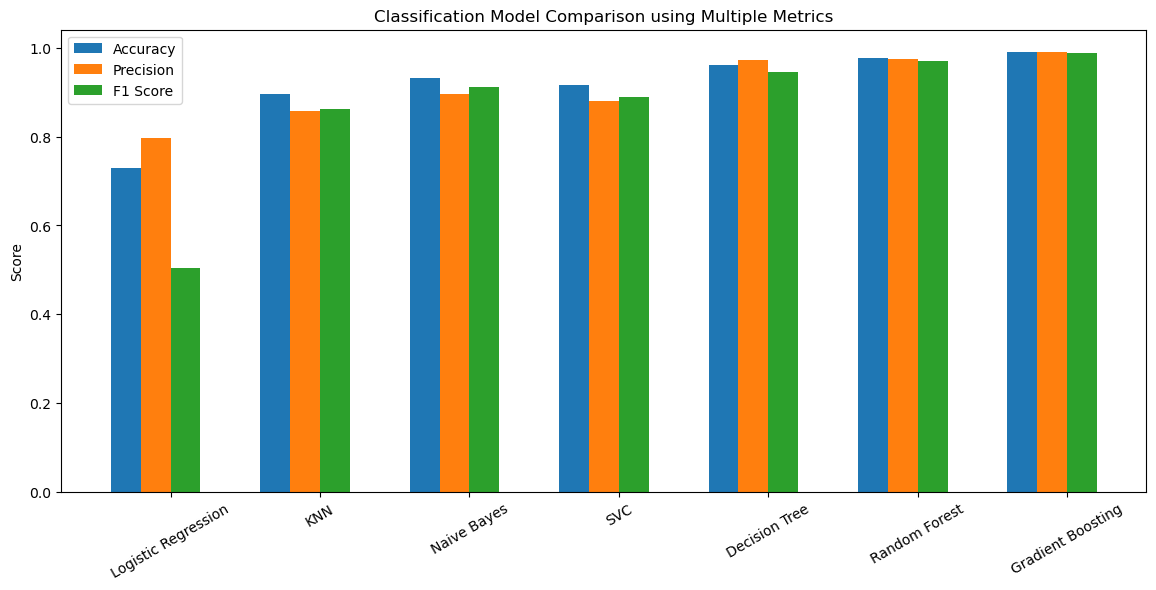

In [153]:
import matplotlib.pyplot as plt
import numpy as np

models = final_results["Model"]
metrics = ["Accuracy", "Precision", "F1 Score"]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(14,6))

for i, metric in enumerate(metrics):
    plt.bar(
        x + i*width,
        final_results[metric],
        width,
        label=metric
    )

plt.xticks(x + width*1.5, models, rotation=30)
plt.ylabel("Score")
plt.title("Classification Model Comparison using Multiple Metrics")
plt.legend()
plt.show()

### Confusion Matrix

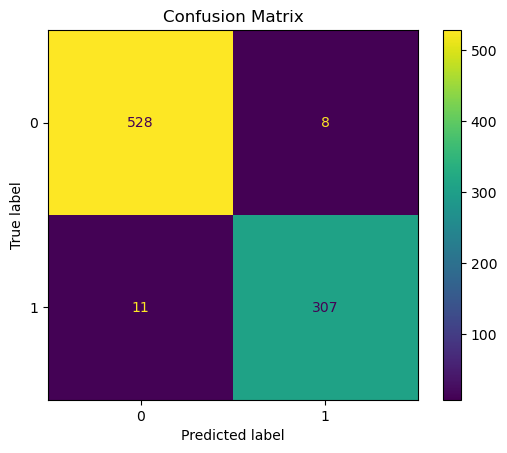

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

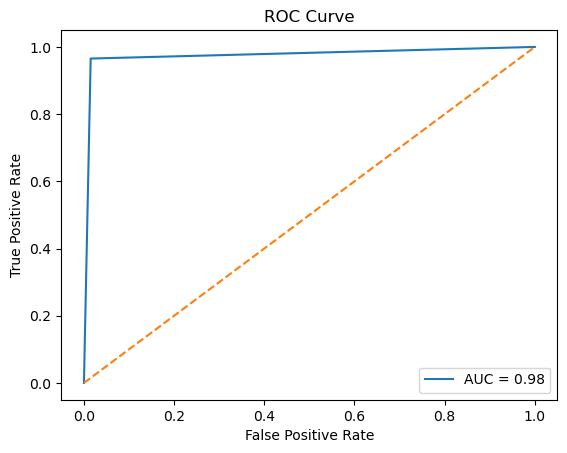

In [155]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Save best Model Using Joblib

In [158]:
import joblib
joblib.dump(gbr, "model.pkl")
joblib.dump(sca, "scaler.pkl")
joblib.dump(edu_le, "edu_encoder.pkl")
joblib.dump(emp_le, "emp_encoder.pkl")

['emp_encoder.pkl']